In [69]:
% matplotlib inline
% run ./ipy_setup.py

In [70]:
import pysam
bam_fp = pysam.AlignmentFile('/hpc/users/neffr01/jason_new/falcon_test/preads4falcon_aligned.sort.bam', 'rb')
edges_list = pd.read_csv('/hpc/users/neffr01/jason_new/falcon_test/2-asm-falcon/sg_edges_list', sep=' ', header=None)

In [ ]:
edge_set = set()
for i in list(edges_list[edges_list[7] == 'G'][0]):
    edge_set.add(i[0:-2])


In [ ]:
bam_fp = pysam.AlignmentFile('/hpc/users/neffr01/jason_new/falcon_test/preads4falcon_aligned.sort.bam', 'rb')
out_bam = pysam.AlignmentFile('/hpc/users/neffr01/jason_new/falcon_test/edges_reads.bam', 'wb', template=bam_fp)
for bamread in bam_fp:
    name = bamread.query_name.split('/')[0]
    if name in edge_set:
        print name, bamread.reference_id, bamread.pos, bamread.aend
        out_bam.write(bamread)
out_bam.close()

In [ ]:
import networkx as nx
net = nx.read_dot('/hpc/users/neffr01/jason_new/falcon_test/2-asm-falcon/sg_edges_list.dot')

In [71]:
import networkx as nx
jasonnet = nx.read_gexf('/hpc/users/neffr01/jason_new/falcon_unzip_jason_071715/3-falcon_unzip/000000F/000000F_0.gexf')

In [ ]:
jasonnet.degree()

In [ ]:
edges_list = set()
for i in jasonnet.nodes():
    if (jasonnet.out_degree(i) > 1) | (jasonnet.in_degree(i) > 1):
        contributedegree = 0
        for pred in jasonnet.predecessors(i):
            if jasonnet[pred][i]['src'] == 'P':
                contributedegree += 1
        for succ in jasonnet.successors(i):
            if jasonnet[i][succ]['src'] == 'P':
                contributedegree += 1
        if contributedegree == 3:
            print i[0:-2]
            edges_list.add(i[0:-2])
edges_list_2 = set()
for i in edges_list:
    try:
        edges_list_2.add(translate_file.ix[int(i)][1])
    except:
        print "ERROR at ", i

In [ ]:
translate_file.tail()

In [127]:
linked_blocks = []
for i in jasonnet.nodes():
    curr_phase = jasonnet.node[i]['phase'].split('_')[0]
    curr_hap = jasonnet.node[i]['phase'].split('_')[1]
    if curr_phase == '-1':
        continue
    for n in jasonnet.predecessors(i):
        next_phase = jasonnet.node[n]['phase'].split('_')[0]
        next_hap = jasonnet.node[n]['phase'].split('_')[1]
        if next_phase == '-1':
            continue
        if next_phase != curr_phase:
            linked_blocks.append([(int(curr_phase), int(curr_hap)), (int(next_phase), int(next_hap))])
    for n in jasonnet.successors(i):
        next_phase = jasonnet.node[n]['phase'].split('_')[0]
        next_hap = jasonnet.node[n]['phase'].split('_')[1]
        if next_phase == '-1':
            continue
        if next_phase != curr_phase:
            linked_blocks.append([(int(curr_phase), int(curr_hap)), (int(next_phase), int(next_hap))])

hap_link_graph = nx.Graph()
for i in linked_blocks:
    cisweight, transweight = 0,0
    (u, hap1), (v,hap2) = i
    weight = 0
    if hap1 == hap2:
        cisweight = 1
    else:
        transweight = 1
    if hap_link_graph.has_edge(u,v):
        currcis = hap_link_graph.edge[u][v]['cis']
        currtrans = hap_link_graph.edge[u][v]['trans']
        hap_link_graph.add_edge(u,v,cis=currcis+cisweight, trans=currtrans+transweight)
    else:
        hap_link_graph.add_edge(u,v,cis = cisweight, trans = transweight)

for e,i in hap_link_graph.edges():
    if hap_link_graph.edge[e][i]['cis'] == hap_link_graph.edge[e][i]['trans']:
        hap_link_graph.remove_edge(e,i)
for i in hap_link_graph.nodes():
    if hap_link_graph.degree(i) == 0:
        hap_link_graph.remove_node(i)

In [128]:
nx.write_gexf(hap_link_graph, '/hpc/users/neffr01/2work/falcon_unzip_jason_071715/hap_link_graph.gexf')

In [169]:
for i in list(nx.connected_component_subgraphs(hap_link_graph)):
    print i.nodes()

[1, 2]
[3, 4]
[11, 12]
[14, 15]
[17, 18, 19]
[26, 27]
[32, 30, 31]
[34, 35]
[46, 47]
[48, 49]
[51, 52]
[62, 63]
[68, 69]
[80, 79]
[83, 84, 175]
[97, 98]
[104, 105]
[109, 110]
[115, 116, 117]
[120, 121, 122]
[128, 127]
[129, 130, 131, 132]
[133, 134]
[136, 137]
[140, 141]
[148, 149]
[152, 153]
[156, 157, 158]
[162, 163]
[164, 165]
[168, 167]
[185, 186]
[188, 189]
[197, 198]
[203, 204]
[206, 207]
[209, 210]
[216, 214, 215]
[220, 221]
[229, 230]
[232, 233, 234]
[238, 239]
[241, 242]
[252, 253]
[259, 260, 261]
[272, 273]


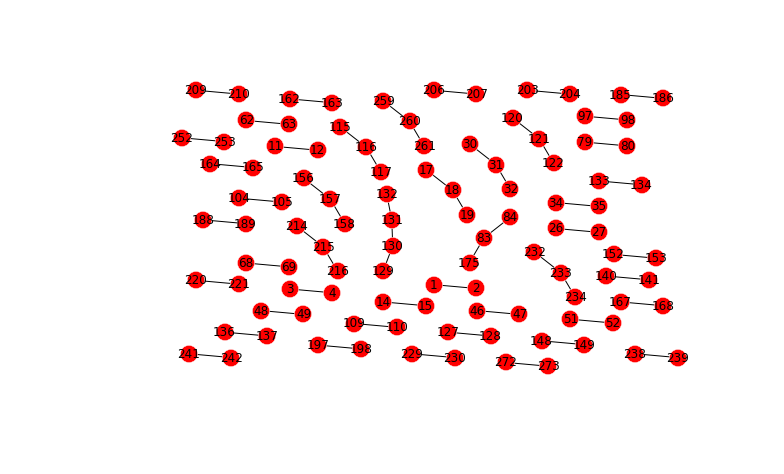

In [142]:
nx.draw_graphviz(hap_link_graph, with_labels=True)

In [ ]:
edges_list_2 = set()
net = jasonnet
in_out_nodes = [i for i in net.nodes() if net.degree(i) == 1]
#print in_out_nodes
sys.stdout.flush()

node_order = []
curr_degree = 2
start_node = in_out_nodes[0]
next_node = net.edges(start_node)[0][1]
curr_degree = net.degree(next_node)
#print start_node
count = 0
last_node = start_node
curr_node = next_node
#print curr_node
while count < 10000:
    count += 1
    #print net.edges(curr_node)
    next_node = [b for a,b in net.edges(curr_node) if b != last_node]
    if len(next_node) == 0:
        print "BREAK at", curr_node
        break
    next_node = next_node[0]
    print last_node, curr_node, next_node
    last_node = curr_node
    curr_node = next_node
    curr_degree = net.degree(curr_node)

In [ ]:
%pylab inline

G = jasonnet

position=nx.graphviz_layout(G, prog='dot', args="-Grankdir=LR" ) 

figure(figsize=(45,8))

ax=subplot(1,1,1)

minx = 1000000
maxx = 0

miny = 1000000
maxy = 0

count = 0
colmap = dict(zip((0,1,2,3,4,5),("r","b","y","c","m","g")))
for e in G.edges():
    v, w = e

    if G[v][w]["src"] != "P":
        continue
        
    phase0 = G.node[v]["phase"].split("_")
    phase1 = G.node[w]["phase"].split("_")
    if int(phase0[0]) not in range(60,69) and int(phase1[0]) not in range(60,69):
        continue
    if int(phase0[0]) == -1:
        col = "k"
    else:
        col =  colmap[int(phase0[0]) % 6]     
    
    xx, yy = zip(position[e[0]], position[e[1]]) 
    
    if xx[0] < 500000 or xx[0] > 500000 + 50000:
        continue
    
    ax.plot( xx, yy, ".-"+col, markersize=1, lw=2) 
    
    minx = min(minx, min(xx))
    maxx = max(maxx, max(xx))
    miny = min(miny, min(yy))
    maxy = max(maxy, max(yy))
    
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

ylim( miny-100, maxy + 100)
xlim( minx-1000, maxx + 1000)

In [ ]:
!hostname

In [ ]:
#%matplotlib inline
G = jasonnet
fig = plt.figure(figsize=(45,8))

ax=plt.subplot(1,1,1)

minx = 1000000
maxx = 0

miny = 1000000
maxy = 0

count = 0
colmap = dict(zip((0,1,2,3,4,5),("r","b","y","c","m","g")))
for e in G.edges():
    v, w = e

    phase0 = G.node[v]["phase"].split("_")
    phase1 = G.node[w]["phase"].split("_")
    if int(phase0[0]) not in range(67,69) and int(phase1[0]) not in range(67,69):
        continue
    if G[v][w]["h_edge"] != "Y":
        continue

    if int(phase0[0]) == -1:
        col = "k"
    else:
        col =  colmap[int(phase0[0]) % 6]     
    
    xx, yy = zip(position[e[0]], position[e[1]]) 

        
    ax.plot(xx, yy, ".-"+col, markersize=1, lw=2) 
    
    minx = min(minx, min(xx))
    maxx = max(maxx, max(xx))
    miny = min(miny, min(yy))
    maxy = max(maxy, max(yy))
    
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

ylim( miny-100, maxy + 100)
xlim( minx-1000, maxx + 1000)

In [ ]:
%matplotlib inline

In [ ]:
nx.draw_graphviz(jasonnet)

In [ ]:
import networkx as nx
net = nx.read_dot('/hpc/users/neffr01/jason_new/falcon_test/2-asm-falcon/sg_edges_list.dot')

In [ ]:
edges_list_2 = set()
in_out_nodes = [i for i in net.nodes() if net.degree(i) == 1]
#print in_out_nodes
sys.stdout.flush()

node_order = []
curr_degree = 2
start_node = in_out_nodes[0]
next_node = net.edges(start_node)[0][1]
curr_degree = net.degree(next_node)
#print start_node
count = 0
last_node = start_node
curr_node = next_node
#print curr_node
while count < 10:
    count += 1
    #print net.edges(curr_node)
    next_node = [b for a,b in net.edges(curr_node) if b != last_node][0]
    print last_node, curr_node, next_node
    last_node = curr_node
    curr_node = next_node
    curr_degree = net.degree(curr_node)

In [ ]:
nx.draw_graphviz(net, prog='dot')

In [ ]:
edges_list_2 = set()
for i in jasonnet.nodes():
    if net.degree(i) > 2:
        print net.node[i]['label']
        edges_list_2.add(net.node[i]['label'].encode('ascii'))

In [ ]:
translate_file = pd.read_csv('/hpc/users/neffr01/jason_new/falcon_unzip_jason_071715/3-falcon_unzip/000000F/q_id_map', sep=" ", header=None)
translate_file.set_index(translate_file[0], inplace=True)

In [ ]:
import pysam
bam_fp = pysam.AlignmentFile('/hpc/users/neffr01/jason_new/hapcut_outputs/hg002_re_000000F/hg002_000000F.new.merged.bam.rg.bam', 'rb')
#out_bam = pysam.AlignmentFile('/hpc/users/neffr01/jason_new/falcon_unzip_jason_071715/edges_reads.bam', 'wb', template=bam_fp)
split_list = []
for bamread in bam_fp:
    name = bamread.query_name
    if name in edges_list_2:
        print name, bamread.reference_id, bamread.pos, bamread.aend
        if bamread.reference_id == 0:
            split_list.append((bamread.pos, bamread.aend))
        #out_bam.write(bamread)
#out_bam.close()

In [ ]:
excelfile = '/hpc/users/neffr01/jason_new/hapcut_outputs/hg002_re_000000F/hapcut_with_indels/hg002_000000F.indels.aftermerge.interblock_stats.tsv'
interblock_stats = pd.read_csv(excelfile, sep='\t')


In [ ]:
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
plt.style.use('ggplot')
rcParams['figure.figsize'] = (20, 16)
rcParams['figure.dpi'] = 150
rcParams['font.size'] = 16
rcParams['font.family'] = 'Bitstream Vera Sans'
a = interblock_stats.block1_end - interblock_stats.block1_size
x = interblock_stats.block1_end
y = interblock_stats.block1_size
long_x = [j for i in zip(a,x) for j in i]
long_y = [j for i in y for j in (i,i)]
fig, ax = plt.subplots()
ax.set_ylabel("block size")
ax.set_xlabel("genomic position (bp)")
ax.plot(long_x, long_y, color='b')
ax.scatter(long_x, long_y, color='r', linewidths=4)
for s,e in split_list:
    ax.axvspan(s,e,ymin=0, ymax=2500000, alpha=1)
ax.minorticks_on()
ax.set_title("Structural variant intersection with haplotype block defintions")
ax.set_xlim([0, 33300000])
ax.set_ylim([-200000,2500000])
#print "N50: ", n50(y)
print "blocks: ", len(y)
plt.show()